In [10]:
import geopandas as gpd
import pandas as pd

In [11]:
# Total Precipitation preparation
# Load CSV
df_csv = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/kualitas_udara/pm25/pm25_satuan.csv')
tp_mean = df_csv.groupby(['longitude', 'latitude'], as_index=False)['pm2p5'].mean()

In [12]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/roniabuhanif/Downloads/BMKG/data_skripsi/petadki_kecamatan_2/DKI JAKARTA.shp")

In [13]:
# Convert DataFrame to GeoDataFrame
geometry = gpd.points_from_xy(tp_mean['longitude'], tp_mean['latitude'])
gdf_csv = gpd.GeoDataFrame(tp_mean, geometry=geometry, crs=4326)


<Axes: >

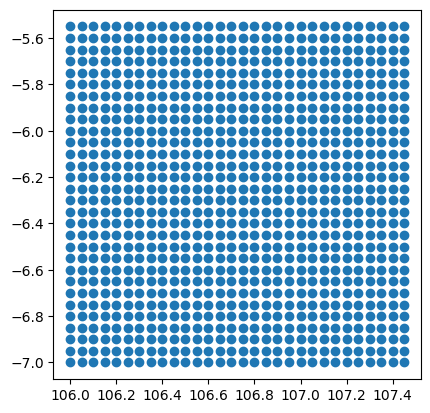

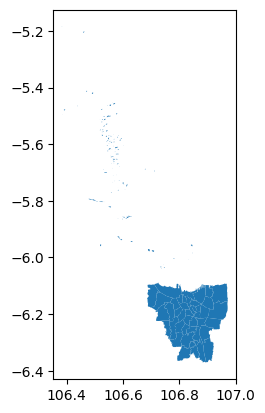

In [14]:
gdf_csv.plot()
gdf_shapefile.plot()

In [15]:
# spatial join
result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')
result_pop = result[['longitude', 'latitude', 'pm2p5', 'KECAMATAN', 'geometry']]

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 24 entries, 437 to 588
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   longitude  24 non-null     float64 
 1   latitude   24 non-null     float64 
 2   pm2p5      24 non-null     float64 
 3   KECAMATAN  24 non-null     object  
 4   geometry   24 non-null     geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 1.1+ KB


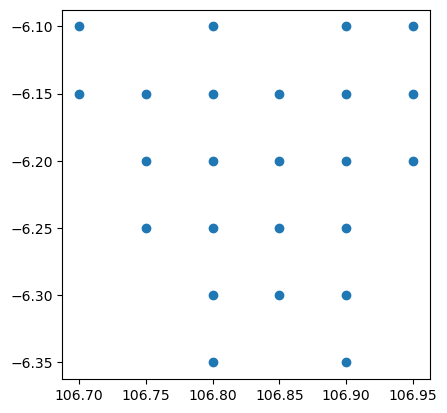

In [16]:
result_pop.plot()
result_pop.info()

In [17]:

dissolved_result = result_pop.dissolve(by='KECAMATAN', aggfunc='mean')
dissolved_result.head(40
                      )

,geometry,longitude,latitude,pm2p5
KECAMATAN,,,,
CAKUNG,POINT (106.95000 -6.20000),106.950,-6.200,1.593668e-07
CENGKARENG,POINT (106.75000 -6.15000),106.750,-6.150,1.593692e-07
CILANDAK,POINT (106.80000 -6.30000),106.800,-6.300,1.700222e-07
CILINCING,"MULTIPOINT ((106.95000 -6.15000), (106.95000 -...",106.950,-6.125,1.511587e-07
CIPAYUNG,"MULTIPOINT ((106.90000 -6.35000), (106.90000 -...",106.900,-6.325,1.675904e-07
JAGAKARSA,"MULTIPOINT ((106.80000 -6.35000), (106.85000 -...",106.825,-6.325,1.696489e-07
KALIDERES,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.700,-6.125,1.541827e-07
KEBAYORAN BARU,POINT (106.80000 -6.25000),106.800,-6.250,1.693445e-07
KELAPA GADING,POINT (106.90000 -6.15000),106.900,-6.150,1.552633e-07


In [18]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')

<Axes: >

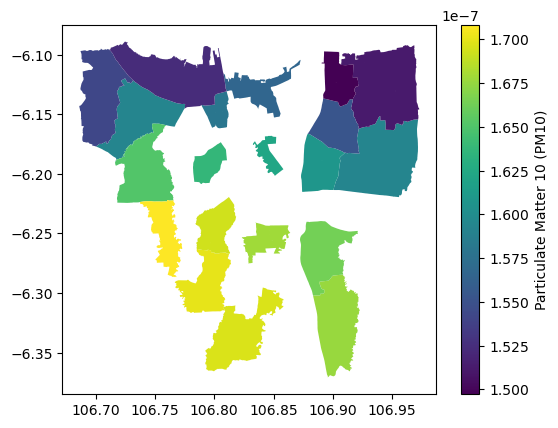

In [19]:
polygon_result.plot(column="pm2p5", legend=True, legend_kwds={"label": "Particulate Matter 10 (PM10)"})

In [20]:
polygon_result.to_file('polygon_pm25_result_kecamatan.shp')

/var/folders/81/vqbnjx_x20zdr2m7bscdvp5r0000gn/T/ipykernel_6491/1539480848.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  polygon_result.to_file('polygon_pm25_result_kecamatan.shp')
